# Test 1. $P_{\rm err}$ vs. average photon energy

In [8]:
# run once before all the other code
import numpy as np
import matplotlib.pyplot as plt
from QI import *

%matplotlib inline
from matplotlib import rc
rc('xtick', labelsize=14) 
rc('ytick', labelsize=14) 
np.set_printoptions(threshold='nan', precision=6, suppress=True)

In [9]:
data = {}
data['TMSS'] = np.loadtxt("./Data_Figs/qcb_tmss.csv", delimiter=',')
data['PS'] = np.loadtxt("./Data_Figs/qcb_ps.csv", delimiter=',')
data['PA'] = np.loadtxt("./Data_Figs/qcb_pa.csv", delimiter=',')
data['PSA'] = np.loadtxt("./Data_Figs/qcb_psa.csv", delimiter=',')
data['PAS'] = np.loadtxt("./Data_Figs/qcb_pas.csv", delimiter=',')

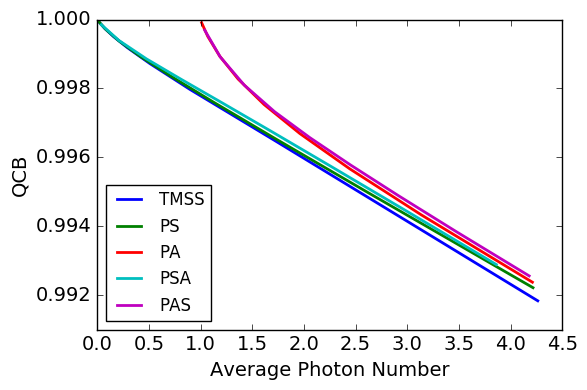

In [10]:
for state in ('TMSS', 'PS', 'PA', 'PSA', 'PAS'):
    plt.plot(data[state][1], data[state][2], lw=2, label=state)
plt.legend(loc=3)
# plt.ylim([0.99, 1])
# plt.xlim([0, 3])
plt.ylabel('QCB', fontsize=14)
plt.xlabel('Average Photon Number', fontsize=14)

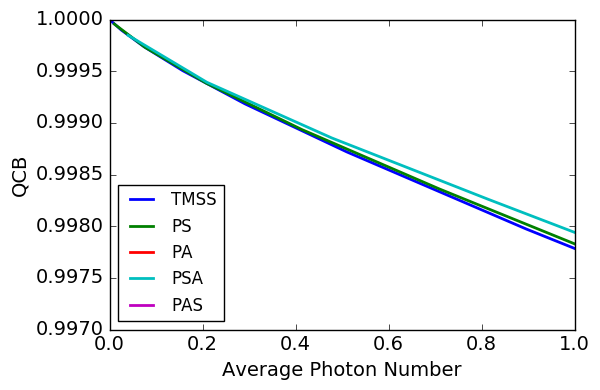

In [13]:
for state in ('TMSS', 'PS', 'PA', 'PSA', 'PAS'):
    plt.plot(data[state][1], data[state][2], lw=2, label=state)
plt.legend(loc=3)
plt.ylim([0.997, 1])
plt.xlim([0, 1])
plt.ylabel('QCB', fontsize=14)
plt.xlabel('Average Photon Number', fontsize=14)

# Test 2. qutip ```norm()``` function

The norm of a state $\rho$ is defined as $\| \rho \| \equiv \sqrt{\rho^{\dagger} \rho}$

In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
# from scipy.special import comb, factorial

from QI import *

In [2]:
state = coherent_dm(5,1)

In [3]:
state

Quantum object: dims = [[5], [5]], shape = [5, 5], type = oper, isherm = True
Qobj data =
[[ 0.36791117  0.36774407  0.26105441  0.14620658  0.08826704]
 [ 0.36774407  0.36757705  0.26093584  0.14614018  0.08822695]
 [ 0.26105441  0.26093584  0.18523331  0.10374209  0.06263061]
 [ 0.14620658  0.14614018  0.10374209  0.05810197  0.035077  ]
 [ 0.08826704  0.08822695  0.06263061  0.035077    0.0211765 ]]

In [4]:
state.norm()

1.0

In [5]:
state_test = basis(2,0) + basis(2,1)

In [6]:
state_test

Quantum object: dims = [[2], [1]], shape = [2, 1], type = ket
Qobj data =
[[ 1.]
 [ 1.]]

In [7]:
state_test.norm()

1.4142135623730951

# Test 3. Quitp `eigenstates()` function

In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
# from scipy.special import comb, factorial

from QI import *

In [2]:
Nth = 0.1     # Average thermal photon numbers
N = 10        # Truncated photon numbers, i.e., 0 ~ N-1
eta = 0.01    # Transmissivity

Ns = 0.01     # Average photon number of the initial two-mode squeezed states
lmd = np.sqrt(Ns/(1 + Ns))     # 
s = np.arcsinh(np.sqrt(Ns))    # Squeezed parameter

In [3]:
rho_0 = RHO_0(TMSS, N, lmd, Nth)
rho_1 = RHO_1(TMSS, N, lmd, Nth, eta)

In [11]:
rho_0.data

<100x100 sparse matrix of type '<type 'numpy.complex128'>'
	with 40 stored elements in Compressed Sparse Row format>

In [12]:
rho_1.data

<100x100 sparse matrix of type '<type 'numpy.complex128'>'
	with 226 stored elements in Compressed Sparse Row format>

In [4]:
gamma = 0.5*rho_1 - 0.5*rho_0

In [6]:
eigval, eigvect = gamma.eigenstates(sparse=True, sort='high')

In [7]:
sum(abs(eigval))

0.0094413487267620104

In [8]:
gamma.norm()

0.0094413487267620087

In [9]:
(1 - gamma.norm()) / 2.0

0.49527932563661897

In [10]:
Helstrom(0.5, rho_0, 0.5, rho_1)

0.49527932563661897

In [13]:
0.5 * QCB(rho_0, rho_1, approx=True)

0.49995710002428295